<a href="https://colab.research.google.com/github/prachi05kulkarni/Emotion-detection-using-CNN/blob/main/MV_EXP_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image from the URL (Make sure the image 'lines.jpg' is in the root directory)
img_path = '101.jpg'
img = cv2.imread(img_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 120)
minLineLength = 20
maxLineGap = 5
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, 100, minLineLength, maxLineGap)

for line in lines:
    for x1, y1, x2, y2 in line:
        cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
cv2.waitKey(0)
cv2.destroyAllWindows()

CIRCLE DETECTION


In [23]:
import cv2
import numpy as np
planets = cv2.imread('planet_glow.jpg')
gray_img = cv2.cvtColor(planets, cv2.COLOR_BGR2GRAY)
img = cv2.medianBlur(gray_img, 5)
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,120,
param1=100,param2=30,minRadius=0,
maxRadius=0)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
# draw the outer circle
  cv2.circle(planets,(i[0],i[1]),i[2],(0,255,0),2)
# draw the center of the circle
cv2.circle(planets,(i[0],i[1]),2,(0,0,255),3)
cv2.imwrite("planets_circles.jpg", planets)
cv2.waitKey()
cv2.destroyAllWindows()

Contours – convex contours and the Douglas-Peucker algorithm


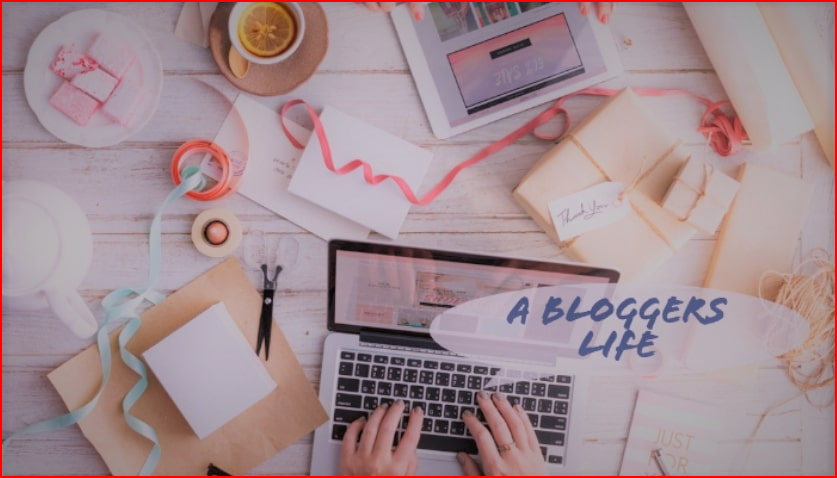

In [25]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image from the URL (Make sure the image 'lines.jpg' is in the root directory)
img_path = '101.jpg'
img = cv2.imread(img_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Find the contour in the image
contours, _ = cv2.findContours(gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnt = contours[0]  # Assuming you want to use the first contour, you can modify this accordingly

# Approximate the contour
epsilon = 0.01 * cv2.arcLength(cnt, True)
approx = cv2.approxPolyDP(cnt, epsilon, True)

# Find the convex hull of the contour
hull = cv2.convexHull(cnt)

# Draw the contours on the image
cv2.drawContours(img, [cnt], -1, (0, 255, 0), 2)
cv2.drawContours(img, [approx], -1, (255, 0, 0), 2)
cv2.drawContours(img, [hull], -1, (0, 0, 255), 2)

# Display the image
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

Contour  – bounding box,minimum area rectangle,minimum enclosing circle


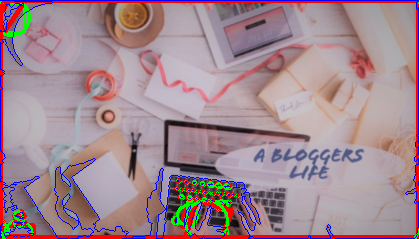

In [27]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image from the URL (Make sure the image 'hammer.jpg' is in the root directory)
img = cv2.pyrDown(cv2.imread("101.jpg", cv2.IMREAD_UNCHANGED))
ret, thresh = cv2.threshold(cv2.cvtColor(img.copy(), cv2.COLOR_BGR2GRAY), 127, 255, cv2.THRESH_BINARY)

# Find contours in the binary image
contours, hier = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for c in contours:
    # find bounding box coordinates
    x, y, w, h = cv2.boundingRect(c)
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
    # find minimum area
    rect = cv2.minAreaRect(c)
    # calculate coordinates of the minimum area rectangle
    box = cv2.boxPoints(rect)
    # normalize coordinates to integers
    box = np.int0(box)
    # draw contours
    cv2.drawContours(img, [box], 0, (0, 0, 255), 3)
    # calculate center and radius of minimum enclosing circle
    (x, y), radius = cv2.minEnclosingCircle(c)
    # cast to integers
    center = (int(x), int(y))
    radius = int(radius)
    # draw the circle
    img = cv2.circle(img, center, radius, (0, 255, 0), 2)

# Draw all contours on the image
cv2.drawContours(img, contours, -1, (255, 0, 0), 1)

# Display the image
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()


CONTOUR DETECTION


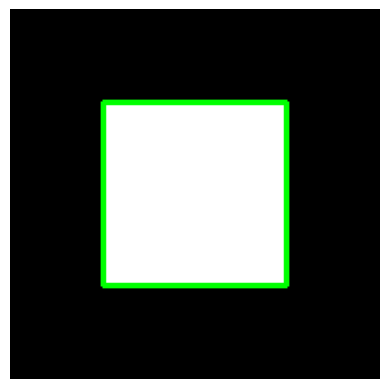

In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = np.zeros((200, 200), dtype=np.uint8)
img[50:150, 50:150] = 255
ret, thresh = cv2.threshold(img, 127, 255, 0)

contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

color = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
img_with_contours = cv2.drawContours(color, contours, -1, (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(img_with_contours, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
